In [1]:
from myPGM.GibbsSampling import GibbsSampling
from myPGM.TabularCPD import TabularCPD

In [2]:
cpd_a = TabularCPD(['A'], values=[[0],[1]])
cpd_b = TabularCPD(['B'], values=[[0.2, 0.3, 0.5, 0.6],[0.8,0.7,0.5,0.4]], evidence=['A','C'])
cpd_c = TabularCPD(['C'], values=[[0.8],[0.2]])
cpd_d = TabularCPD(['D'], values=[[1, 1],[0, 0]], evidence=['B'])
cpd_e = TabularCPD(['E'], values=[[0.6, 0.6],[0.4, 0.4]], evidence=['B'])

In [3]:
from myPGM.BayesianModel import BayesianModel

bayes = BayesianModel([('A', 'B'),('C', 'B'),('B', 'D'),('B','E')])

In [4]:
bayes.add_cpds(cpd_a, cpd_c, cpd_b, cpd_d, cpd_e)

In [5]:
bayes.print_graph()

Node D has parents ['B']
Node C has parents []
Node E has parents ['B']
Node A has parents []
Node B has parents ['A', 'C']

CPDs: 
Query variables: D
Evidences: B
CPD: 
[[1 1]
 [0 0]]
Query variables: C
Evidences: 
CPD: 
[[ 0.8]
 [ 0.2]]
Query variables: E
Evidences: B
CPD: 
[[ 0.6  0.6]
 [ 0.4  0.4]]
Query variables: A
Evidences: 
CPD: 
[[0]
 [1]]
Query variables: B
Evidences: A, C
CPD: 
[[ 0.2  0.3  0.5  0.6]
 [ 0.8  0.7  0.5  0.4]]


In [9]:
inference = GibbsSampling(bayes)

In [10]:
import pandas as pd

In [11]:
df = inference.sample(size=100, query=['B'], evidence={'E': 0})
df

,B
0,0
1,1
2,1
3,0
4,1
5,0
6,0
7,0
8,0
9,0


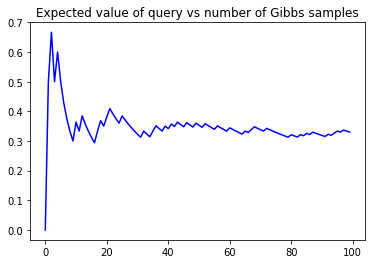

In [17]:
import matplotlib.pyplot as plt

expectation = []
sum=0
#print(df['B'])
for i, row in enumerate(df['B']):
    #print(row)
    sum+=row
    expectation.append(sum/(i+1))
#print(expectation)
#print(len(df.index))
#df = df.cumsum()
fig, ax = plt.subplots()
ax.plot(df.index,expectation,'b')
ax.set_title("Expected value of query vs number of Gibbs samples")
plt.show()

### Compare myPGM with pgmpy (Python library for PGMs)

In [19]:
from pgmpy.factors.discrete import TabularCPD as TCPD
from pgmpy.models import BayesianModel as BM
from pgmpy.sampling import GibbsSampling as Gibbs

In [14]:
bayes_pgm = BM([('A', 'B'),('C', 'B'),('B', 'D'),('B','E')])

In [15]:
cpd_a_pgm = TCPD('A', 2, values=[[0],[1]])
cpd_c_pgm = TCPD('C', 2, values=[[0.8],[0.2]])
cpd_b_pgm = TCPD('B', 2, values=[[0.2, 0.3, 0.5, 0.6],[0.8,0.7,0.5,0.4]], evidence=['A','C'], evidence_card=[2, 2])
cpd_d_pgm = TCPD('D', 2, values=[[1, 1],[0, 0]], evidence=['B'], evidence_card=[2])
cpd_e_pgm = TCPD('E', 2, values=[[0.6, 0.6],[0.4, 0.4]], evidence=['B'], evidence_card=[2])

In [16]:
bayes_pgm.add_cpds(cpd_a_pgm, cpd_c_pgm, cpd_b_pgm, cpd_d_pgm, cpd_e_pgm)

In [20]:
inference = Gibbs(bayes_pgm)

C:\Users\mikew\Anaconda3\lib\site-packages\pgmpy\factors\discrete\CPD.py:265: RuntimeWarning: invalid value encountered in true_divide
  tabular_cpd.values = (cpd / cpd.sum(axis=0)).reshape(tabular_cpd.cardinality)


In [21]:
pgm_df = inference.sample(size=100)

In [22]:
pgm_df

,D,C,E,A,B
0,0,1,1,0,0
1,0,1,1,1,1
2,0,0,0,1,1
3,0,0,1,1,1
4,0,1,1,1,1
5,0,0,0,1,0
6,0,0,1,1,0
7,0,0,0,1,0
8,0,1,0,1,0
9,0,0,0,1,0


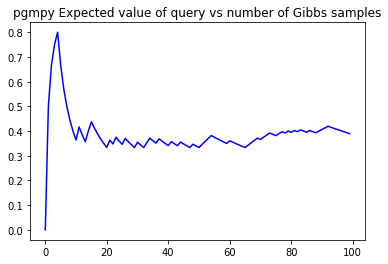

In [23]:
import matplotlib.pyplot as plt

pgm_expectation = []
sum=0
#print(df['B'])
for i, row in enumerate(pgm_df['B']):
    #print(row)
    sum+=row
    pgm_expectation.append(sum/(i+1))
#print(expectation)
#print(len(df.index))
#df = df.cumsum()
fig, ax = plt.subplots()
ax.plot(df.index,pgm_expectation,'b')
ax.set_title("pgmpy Expected value of query vs number of Gibbs samples")
plt.show()